In [1]:
import pathlib
import shutil
import tempfile
import os
import numpy as np
import biom
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from qiime2.plugins.feature_table.visualizers import summarize as summarize_table
from qiime2 import Artifact, Metadata

In [2]:
#Importing from a biom table
biom_table = biom.load_table('feature_table.biom')

#Or importing from a qza file and translating to a biom table 
qza_table = Artifact.load('feature_table.qza')
table = qza_table.view(biom.Table)

In [3]:
#Summarizing and viewing the table
qza_table_sum = summarize_table(qza_table)
qza_table_sum.visualization

<visualization: Visualization uuid: bc76b978-7916-48bc-af43-d87f57c4f29b>

In [14]:
#Getting a table that has frequency of each feature in each sample! 
biom_df = table.to_dataframe()

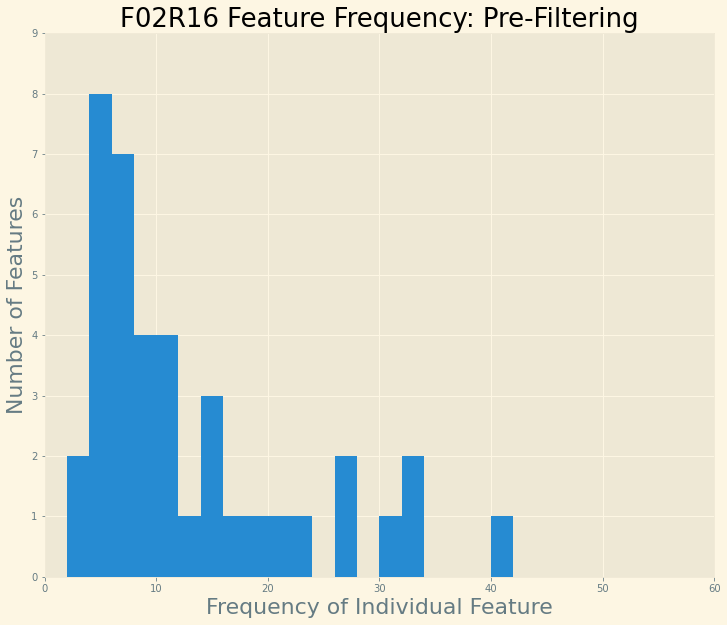

In [15]:
#Create a histogram showing frequency of occurence in one exapmle sample
mini_df = biom_df['F02R16']._get_numeric_data()
mini_dense = mini_df.sparse.to_dense()
mini_dense = mini_dense.tolist()
mini_dense = [x for x in mini_dense if x != 0]
plt.style.use('Solarize_Light2')
plt.figure(figsize = (12,10))
plt.xlim(0,60)
plt.ylim(0,3)
plt.yticks(range(0,10,1))
bin_list = range(0,60,2)
plt.hist(mini_dense, bins=bin_list)
plt.xlabel('Frequency of Individual Feature', size = 22)
plt.ylabel('Number of Features', size = 22)
plt.title('F02R16 Feature Frequency: Pre-Filtering', size = 26)
plt.savefig('./images/pre_filter.png')
plt.show()

In [17]:
# Filter out any feature from a sample if it has less than 6 reads,
# Which is the maximum number of expected Index Jumps in Sample F02R16
biom_df = biom_df._get_numeric_data()
biom_dense = biom_df.sparse.to_dense()

biom_dense[biom_dense < 6] = 0

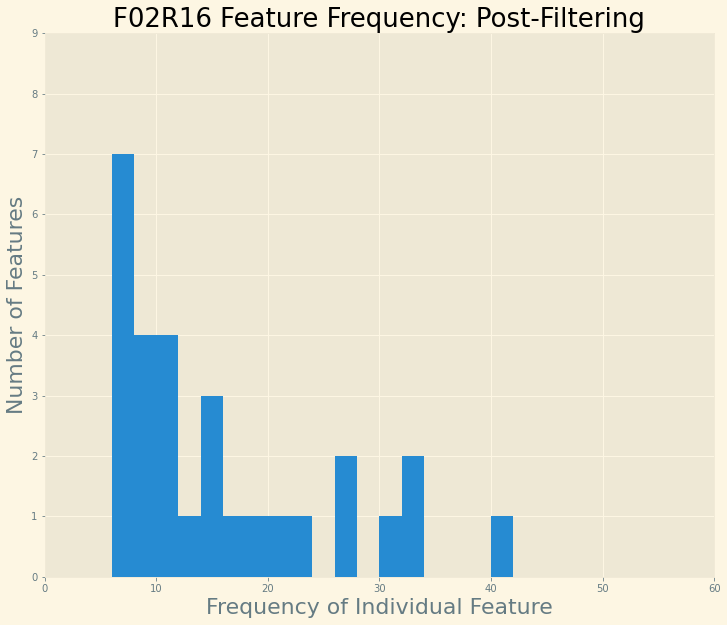

In [21]:
# Create a histogram showing frequency of occurence in same sample after filtering
mini_dense_b = biom_dense['F02R16']
mini_dense_b = mini_dense_b.tolist()
mini_dense_b = [x for x in mini_dense_b if x != 0]
plt.style.use('Solarize_Light2')
plt.figure(figsize = (12,10))
plt.xlim(0,60)
plt.ylim(0,3)
plt.yticks(range(0,10,1))
bin_list = range(0,60,2)
plt.hist(mini_dense_b, bins=bin_list)
plt.xlabel('Frequency of Individual Feature', size = 22)
plt.ylabel('Number of Features', size = 22)
plt.title('F02R16 Feature Frequency: Post-Filtering', size = 26)
plt.savefig('./images/post_filter.png')
plt.show()

In [22]:
#Translate the filtered table back into a qza 
biom_dense = biom_dense.transpose()
freq_filt_table = Artifact.import_data("FeatureTable[Frequency]", biom_dense)

In [23]:
#Summarize and viewing the table 
freq_filt_table_sum = summarize_table(freq_filt_table)
freq_filt_table_sum.visualization

<visualization: Visualization uuid: d7aae89e-9dfd-4aee-9063-c1be344c66ce>